### CIS 9 - Lab 4: NLP

In [97]:
# Name: Pratyush Shanbhag

There are 2 NLP problems in this lab. They are in Part 1 and Part 2.

In [98]:
# import files
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
from nltk.tokenize import RegexpTokenizer
'''from nltk.tokenize import word_tokenize
rom nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import names
from nltk.classify import NaiveBayesClassifier
from sklearn.feature_extraction.text import CountVectorizer'''

'from nltk.tokenize import word_tokenize\nrom nltk.corpus import stopwords\nfrom nltk.stem import PorterStemmer\nfrom nltk.corpus import names\nfrom nltk.classify import NaiveBayesClassifier\nfrom sklearn.feature_extraction.text import CountVectorizer'

#### Part 1

Use NLTK to build a model that analyzes movie reviews to determine if the reviews say that the movie is good or bad.<br>
The input file has reviews from the website Rotten Tomatoes and is named _rottentomatoes.csv_ ([source](https://www.kaggle.com/code/amilsilahic/rotten-tomatoes-sentiment/data?select=data_rt.csv)).<br>
In the file the label 1 means it's a good movie, and the label 0 means it's a bad movie.

1. __Read data from the file _rottentomatoes.csv_ into a DataFrame__.<br>
Then __print the number of rows and columns of the DataFrame__,<br>
and __print the first 5 rows__ to observe the dataset.

In [99]:
df = pd.read_csv("rottentomatoes.csv")
print("Shape:", df.shape)
print(df.head())

Shape: (10662, 2)
                                             reviews  labels
0                  simplistic , silly and tedious .        0
1  it's so laddish and juvenile , only teenage bo...       0
2  exploitative and largely devoid of the depth o...       0
3  [garbus] discards the potential for pathologic...       0
4  a visually flashy but narratively opaque and e...       0


2.  __Check to see if there are NaN__ and __drop the rows with NaN__ if needed.

In [100]:
if df.isnull().values.any():
    df.dropna(inplace=True)

3. __Check if the labels are balanced data__.<br>
Then __create a Raw NBConvert cell to indicate whether the data is balanced__.

In [101]:
df["labels"].value_counts()

0    5331
1    5331
Name: labels, dtype: int64

4. __Print the index of good movies and the bad movies__.<br>
Then __create a Raw NBConvert cell to explain where the good movies and bad movies are in the DataFrame__.<br>
Example of explanation: good movies are in row index 0 - 3000 and 5000-8000

In [102]:
print(df.index[df["labels"] == 0].tolist())
print("\n\n\n\n\n")
print(df.index[df["labels"] == 1].tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

5. __Create the X and y datasets__<br>
Then __print the number of rows and columns of X and y__.

In [103]:
X = df["reviews"]
y = df["labels"]
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (10662,)
Shape of y: (10662,)


6. __Process the X dataset to remove stop words__<br>
then __print the first 5 rows of the resulting processed X dataset__

In [104]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
tokenizer = RegexpTokenizer('\w+')

print(X.head())

for i in range(X.shape[0]):
    only_words = tokenizer.tokenize(X[i])
    X[i] = ' '.join([word for word in only_words if word not in stop_words])

print(X.head())

0                    simplistic , silly and tedious . 
1    it's so laddish and juvenile , only teenage bo...
2    exploitative and largely devoid of the depth o...
3    [garbus] discards the potential for pathologic...
4    a visually flashy but narratively opaque and e...
Name: reviews, dtype: object


/var/folders/vn/h1ydhq9x7dg0y10vn8c2db040000gn/T/ipykernel_94067/2621276200.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ' '.join([word for word in only_words if word not in stop_words])


0                             simplistic silly tedious
1    laddish juvenile teenage boys could possibly f...
2    exploitative largely devoid depth sophisticati...
3    garbus discards potential pathological study e...
4    visually flashy narratively opaque emotionally...
Name: reviews, dtype: object


7a. Now that the stop words are removed, let's see what the top 10 words for the good and bad movies are.<br>
__Find and plot the top 10 most used words in reviews for good movies__<br>
Hint: the result of step 4 can help you select the reviews for good movies

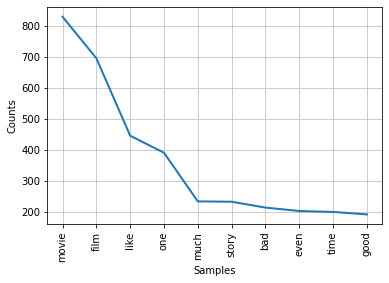

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [105]:
only_words = tokenizer.tokenize(' '.join(X.head(5331)))
gfreqD = nltk.FreqDist(only_words)
gfreqD.plot(10)

#### 7b. __Find and plot the top 10 most used words in review for bad movies__<br>
Hint: the result of step 4 can help you select the reviews for bad movies

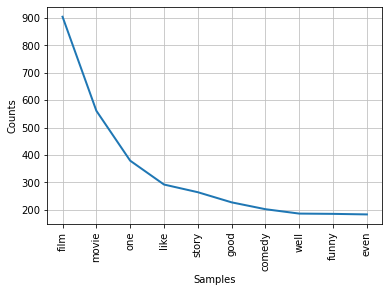

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [106]:
only_words = tokenizer.tokenize(' '.join(X.tail(5331)))
bfreqD = nltk.FreqDist(only_words)
bfreqD.plot(10)

7c. __Create a Raw NBConvert cell__ to explain whether the top 10 words in a review are a good indication of good vs bad movies.

8. __Convert the processed X dataset to vectors of numbers__<br>
Then __print the shape of the X vectors__

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(X)
X_vectors = vect.transform(X)
print(X_vectors[0])
X_vectors.shape

  (0, 14515)	1
  (0, 14532)	1
  (0, 16049)	1


(10662, 18190)

9. __Divide the X vectors and y datasets into training and testing set__<br>
Then __print the shape of each set__.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8529, 18190) (8529,) (2133, 18190) (2133,)


10. __Train the MultinomialNB model with the training data__<br>
Then __test it with the testing data__ and __print both the accuracy score and the confusion matrix__

In [109]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred, labels=[0,1])

0.7801218940459447


array([[806, 236],
       [233, 858]])

11. Now we test the model with a completely new dataset<br>
__Read the file _movies.csv_ in to a DataFrame__. _movies.csv_ has movie reviews from the website IMDb ([source](https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis))<br>
Then __print the number of rows and columns of the DataFrame__ and __print the first 5 rows__ to inspect the data.<br>
In the dataset, a label of 0 means bad movie, and a label of 1 means good movie.

In [110]:
movies = pd.read_csv("movies.csv")
print("Shape:", movies.shape)
print(movies.head())

Shape: (40000, 2)
                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1


12. Skipping the steps to check for balanced data and to check for NaN (they've been checked for you):<br>
__Create the X and y datasets__ and __print the number of rows and columns__ of each set

In [111]:
X = movies["text"]
y = movies["label"]
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (40000,)
Shape of y: (40000,)


13. __Process the X dataset__ <u>in the same way</u> that you processed the X data from Rotten Tomatoes above.<br>
Then __print the first 5 rows of the processed X dataset__<br>
Take advantage of code re-use, now is not the time to blindly copy-and-paste.

In [112]:
print(X.head())

for i in range(X.shape[0]):
    only_words = tokenizer.tokenize(X[i])
    X[i] = ' '.join([word for word in only_words if word not in stop_words])

print(X.head())

0    I grew up (b. 1965) watching and loving the Th...
1    When I put this movie in my DVD player, and sa...
2    Why do people who do not know what a particula...
3    Even though I have great interest in Biblical ...
4    Im a die hard Dads Army fan and nothing will e...
Name: text, dtype: object


/var/folders/vn/h1ydhq9x7dg0y10vn8c2db040000gn/T/ipykernel_94067/936024150.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ' '.join([word for word in only_words if word not in stop_words])


0    I grew b 1965 watching loving Thunderbirds All...
1    When I put movie DVD player sat coke chips I e...
2    Why people know particular time past like feel...
3    Even though I great interest Biblical movies I...
4    Im die hard Dads Army fan nothing ever change ...
Name: text, dtype: object


14. __Convert the processed X strings into vectors__ <u>in the same way</u> as you did for the Rotten Tomatoes reviews.<br>
Then __print the shape of the X vectors__<br>
Take advantage of code re-use, now is definitely not the time to blindly copy-and-paste.<br>

(If you copy-and-paste from above, it's guaranteed not to work. You need to understand what goes on above to know what to re-use.<br> Yes, it's the last lab and I'm showing my evil self)

In [113]:
'''vect.fit(X)
X_vectors = vect.transform(X)
print(X_vectors[0])
X_vectors.shape'''

'vect.fit(X)\nX_vectors = vect.transform(X)\nprint(X_vectors[0])\nX_vectors.shape'

15. __Test the NLP model that you've trained above with the new X vectors__<br>
Then __print the accuracy and confusion matrix__

---

#### Part 2

Use NLTK to create a model that can identify the (human) language of a given text string.<br>
The model will "learn" the languages from the file _languagedetection.csv_ ([source](https://www.kaggle.com/code/emirhanai/language-detection-artificial-intelligence-97-f1/data?select=language_detection.csv))

1. __Read data from _languagedetection.csv_ into a DataFrame.__<br>
Then __print the number of rows and columns of the DataFrame__<br>
and __print the first 10 rows of data__.

In [114]:
lang = pd.read_csv("languagedetection.csv")
print("Shape:", lang.shape)
print(lang.head(10))

Shape: (22000, 2)
                                                Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch
5  エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...  Japanese
6  tsutinalar i̇ngilizce tsuutina kanadada albert...   Turkish
7  müller mox figura centralis circulorum doctoru...     Latin
8  برقی بار electric charge تمام زیرجوہری ذرات کی...      Urdu
9  シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...  Japanese


2. Given that there is no NaN in the file, __print the number of unique languages that are in the dataset__.<br>
Then __print each language and the corresponding number of strings (rows) with that language__.<br>
The second output should be a list of 1 instance of each language, and the corresponding count.

In [117]:
print(lang["language"].nunique())

22


3. __Change each languages to a unique number__.<br>
Then __print the first 5 rows of the DataFrame__.<br>
You should not have to type all the languages individually to do the conversion.

In [118]:
lang["language"] = pd.factorize(lang["language"])[0]
print(lang.head())

                                                Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...         0
1  sebes joseph pereira thomas  på eng the jesuit...         1
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...         2
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...         3
4  de spons behoort tot het geslacht haliclona en...         4


4. __Create the X and y datasets from the DataFrame__.<br>
Then __print the number of rows and columns of X and y__.

In [119]:
X = lang["Text"]
y = lang["language"]
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (22000,)
Shape of y: (22000,)


5. __Prepare the X dataset to use with the MultinomialNB model__<br>
You'll need to decide what preparation is needed.

6. __Create the training and testing sets__ from the prepared X dataset and y dataset.<br>
Then __print the shape of each training and testing set__

7. __Train and test the MultinomialNB model__, then __print the accuracy of the model__.

---

#### EC

Since this is the last lab, the following part is extra credit (2pts) and is optional.<br>
For the EC, you'll let the user enter text strings in different languages, and the model will try to identify the language.<br>
If the user enters a language that the model has not been trained with, it will guess within the trained languages and will be wrong.

8. __Create a look up table that's the reverse look up of how you converted the language name to a number__.<br>
For example, if English was converted to 20, then this look up table will return English when given the number 20.

9. __Write a function__ that will:
- accept a text string
- convert the string to a list of 1 string:  `listOfString = [aString]` if `aString` is a Python string
- prepare the list of 1 string and pass it to the model 
- convert the output from the model (a number) back to the language (for example, 20 => English)
- return the language

10. __Fill in your function name below__ (don't leave is as your_function_name, you're more professional than that)<br>
and __uncomment to test your model__.<br>
The sample output is included below but will be gone when you run the cell with your code.

In [5]:
'''
while True :
    text = input("Enter your text: ")
    if len(text) == 0 :
        break
    print("Language:", your_function_name(text))
'''

Enter your text: Veni, vidi, vici
Language: Latin
Enter your text: c'est la vie
Language: French
Enter your text: Mulțumesc foarte mult
Language: Romanian
Enter your text: ¿Qué te gusta hacer?
Language: Spanish
Enter your text: Como vai?
Language: Portugese
Enter your text: one two three four
Language: English
Enter your text: 
